In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import keras as keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from random import randint
from keras.utils import np_utils

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

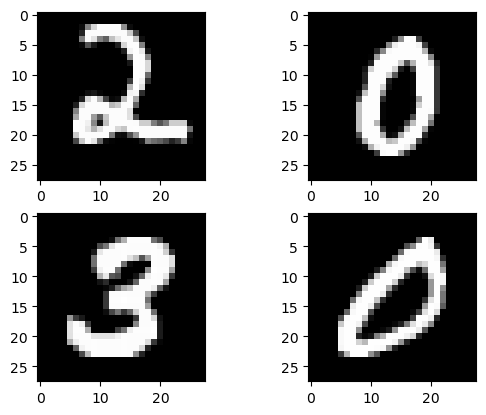

In [25]:
plt.subplot(221)
plt.imshow(x_train[randint(0,len(x_train))],'gray')


plt.subplot(222)
plt.imshow(x_train[randint(0,len(x_train))],'gray')

plt.subplot(223)
plt.imshow(x_train[randint(0,len(x_train))],'gray')

plt.subplot(224)
plt.imshow(x_train[randint(0,len(x_train))],'gray')

plt.show()

In [26]:
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

60000
28
28


In [6]:
num_pixels=x_train.shape[1] * x_train.shape[2]
x_train=x_train.reshape((x_train.shape[0],num_pixels)).astype('float32')
x_test=x_test.reshape((x_test.shape[0],num_pixels)).astype('float32')
x_train=x_train/255
x_test=x_test/255   #normalize

In [7]:
y_train=np_utils.to_categorical(y_train)   #n codindg one hot
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

In [8]:
#make nutral network

model=Sequential()
                  #number of dimentions for input features
model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))#vorodi
          
model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))   #khoroji dar vaghe shabake asabi sakhteh shod
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])    #dar enteha bayad complie konim      
          
          
          

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train,y_train,
              validation_data=(x_test,y_test),batch_size=200,
    epochs=10,verbose=True)

Epoch 1/10
300/300 [==============================] - 5s 13ms/step - loss: 0.2782 - accuracy: 0.9218 - val_loss: 0.1386 - val_accuracy: 0.9591
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1121 - accuracy: 0.9676 - val_loss: 0.0945 - val_accuracy: 0.9703
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0707 - accuracy: 0.9798 - val_loss: 0.0745 - val_accuracy: 0.9767
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.0678 - val_accuracy: 0.9781
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0359 - accuracy: 0.9902 - val_loss: 0.0628 - val_accuracy: 0.9791
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.0632 - val_accuracy: 0.9791
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.0631 - val_accuracy: 0.9803
E

In [12]:
scores=model.evaluate(x_test,y_test)
print('ERROR: %.2f%%' % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9815
ERROR: 1.85%


In [13]:
#khataye test

In [14]:
d=np.random.random_integers(0,255+1,num_pixels)

C:\Users\saras\AppData\Local\Temp\ipykernel_3300\2931296799.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 256 + 1) instead
  d=np.random.random_integers(0,255+1,num_pixels)


In [15]:
np.max(d)

256

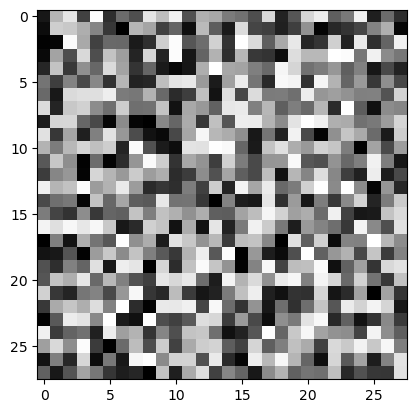

In [16]:
plt.imshow(d.reshape((28,28)),'gray')
plt.show()

In [17]:
d.shape

(784,)

In [18]:
p=model.predict(d.reshape(1,-1))

1/1 [==============================] - 0s 235ms/step


In [19]:
np.argmax(p)

5

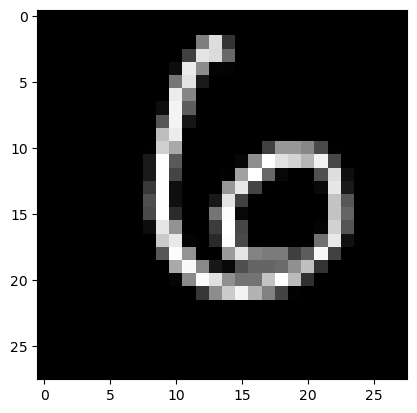

In [20]:
plt.imshow(x_test[100].reshape(28,28),'gray')